<h1>KNN classification</h1>
<p>works on categorical data
"here we are taking an iris dataset"</p>

In [1]:
import pandas as pd
df=pd.read_csv("Iris.csv")

In [2]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
df.isnull().sum()#no missing data

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [64]:
X=df.drop(columns=['Species','Id'])

In [65]:
Y=df['Species']

Text(0, 0.5, 'SepalWidth')

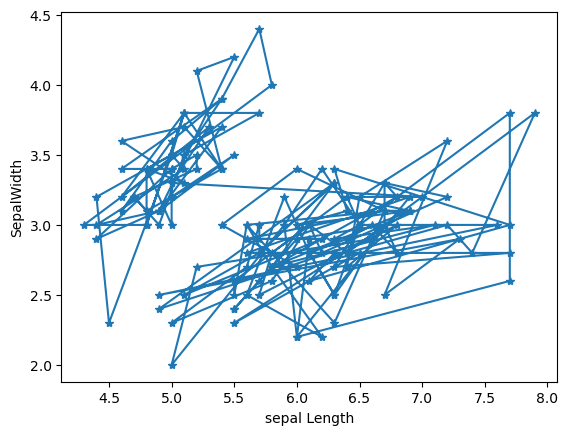

In [97]:
import matplotlib.pyplot as plt
plt.plot(df['SepalLengthCm'],df['SepalWidthCm'],marker='*')
plt.xlabel("sepal Length")
plt.ylabel("SepalWidth")

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train,y_test=train_test_split(X,Y, test_size=0.2)

In [68]:
print(f"x training data:{x_train.shape}")
print(f"x test data:{x_test.shape}")
print(f"y training data:{y_train.shape}")
print(f"y test data:{y_test.shape}")

x training data:(120, 4)
x test data:(30, 4)
y training data:(120,)
y test data:(30,)


In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
classs=KNeighborsClassifier(n_neighbors=2)

In [71]:
classs.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

Text(0, 0.5, 'Predicted')

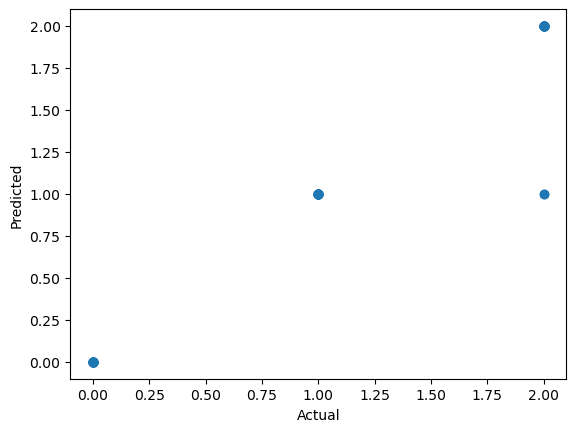

In [99]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred_train)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [79]:
y_pred_train=classs.predict(x_train)
y_pred_train

array([1, 2, 0, 2, 0, 1, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0,
       2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0, 2, 2,
       1, 1, 1, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 1,
       2, 0, 1, 2, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0,
       0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 2, 1, 0,
       0, 2, 2, 2, 0, 1, 2, 1, 0, 2], dtype=int8)

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.95      1.00      0.97        38
           2       1.00      0.95      0.97        41

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

[[41  0  0]
 [ 0 38  0]
 [ 0  2 39]]


In [76]:
y_pred_test=classs.predict(x_test)
print(classification_report(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        12
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

[[ 9  0  0]
 [ 0 12  0]
 [ 0  1  8]]


<pre><h6><b>Confusion Matrix</b>
The confusion matrix is a 3x3 matrix for the three classes (0, 1, 2) that shows the counts of true positive, false positive, and false negative predictions.
Consider a medical test for a disease where:

True Positive (TP): Sick patients correctly identified as sick.
True Negative (TN): Healthy patients correctly identified as healthy.
False Positive (FP): Healthy patients incorrectly identified as sick.
False Negative (FN): Sick patients incorrectly identified as he</h6></pre>lthy.

<h2>Breakdown of the Confusion Matrix:</h2>
<table><th>Actual \ Predicted</th>	<th>Predicted 0</th>	<th>Predicted 1</th>	<th>Predicted 2</th>
<tr><td>Actual 0</td>	<td>9	</td><td>0</td>	<td>0</td></tr>
<tr><td>Actual 1</td>	<td>0	</td><td>12</td>	<td>0</td</tr>
<tr><td>Actual 2</td>	<td>0	</td><td>1</td>	<td>8</td</tr>
</table>


<pre>Precision
Definition: Precision is the ratio of true positive predictions to the total number of positive predictions made by the model. In other words, it measures the accuracy of the positive predictions.
Recall
Definition: Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total number of actual positive instances. It measures the ability of the model to identify all relevant instances.</pre>

In [90]:
# Predict the value for a new specie
import numpy as np
X_new = np.array([[7.0,3.2,4.7,1.4]])  # Note the double brackets to make it 2D
y_pred = classs.predict(X_new)
y_pred#array[1]	==Species Iris-versicolor

D:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int8)